<a href="https://colab.research.google.com/github/OndwelaT/OndwelaT.github.io/blob/main/Evaluation_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Print the column names
print(df.columns)



Index(['actual', 'zero shot', 'few shot', 'contexual', 'instruction'], dtype='object')


# Chatgpt

In [ ]:

!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)
# Print the updated DataFrame
print(df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.8 MB/s eta 0:00:00
       actual  zero shot   few shot  contexual instruction
0     NEUTRAL   Positive   Positive   Negative    Negative
1    POSITIVE   Negative   Negative   Negative    Negative
2    NEGATIVE   Negative   Negative   Negative    Negative
3    NEGATIVE   Negative   Negative    Neutral     Neutral
4    POSITIVE    Neutral    Neutral   Positive    Negative
..        ...        ...        ...        ...         ...
385  NEGATIVE   Negative   NEGATIVE   Negative     Neutral
386  POSITIVE   Positive   POSITIVE   Positive    Negative
387  NEGATIVE   Negative   POSITIVE   Positive     Neutral
388  POSITIVE    Neutral   NEGATIVE    Neutral    Positive
389  POSITIVE   Positive   POSITIVE   Positive     Neutral

[390 rows x 5 columns]


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)
# Print the head of the DataFrame to verify the changes
print(df.head())

     actual   few shot
0   neutral   positive
1  positive   negative
2  negative   negative
3  negative   negative
4  positive    neutral


### Zero shot

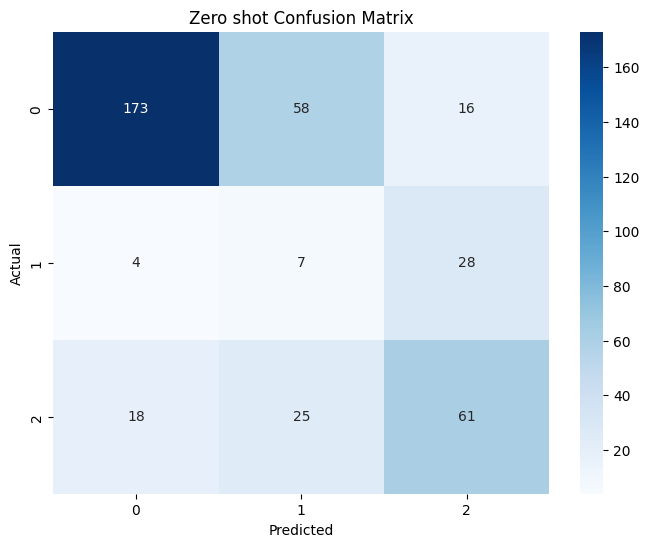

Accuracy: 0.617948717948718
Precision: 0.7245787545787545
Recall: 0.617948717948718
F1 Score: 0.6622913674033265


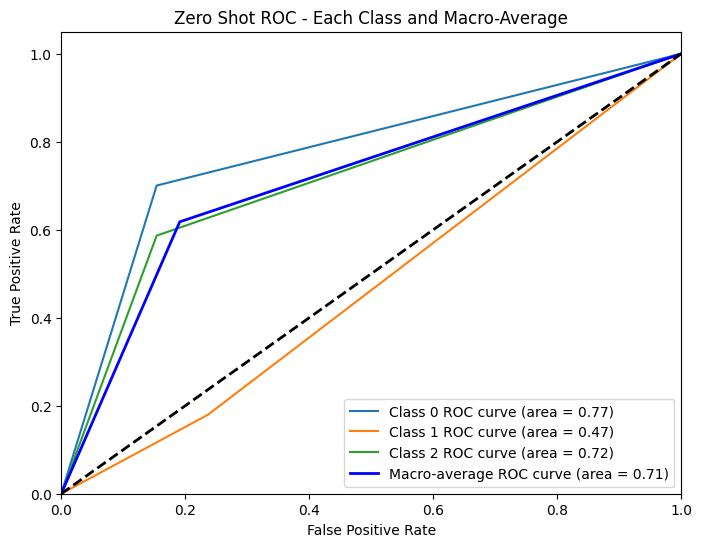

ROC AUC (Class 0): 0.7732793522267207
ROC AUC (Class 1): 0.47150997150997154
ROC AUC (Class 2): 0.716346153846154
ROC AUC (Macro-average): 0.7134615384615385


<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install pyspellchecker
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
df['zero shot'] = df['zero shot'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)

# Load the corrected Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['few shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)

# Load the DataFrame again
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['zero shot'] = df['zero shot'].str.lower().str.strip()

# Map sentiments for 'zero shot' column
df['zero shot_sentiment'] = df['zero shot'].map(sentiment_mapping)

# Drop original sentiment columns
drop_columns = ['actual', 'zero shot']
df = df.drop(drop_columns, axis=1)

# Save the DataFrame with mapped sentiments
data = df
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame with mapped sentiments
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['zero shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap with class labels 0, 1, 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Zero shot Confusion Matrix')
plt.show()

# Calculate  evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using macro-averaging for multiclass
# Binarize the output
n_classes = len(df['actual_sentiment'].unique())  # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Shot ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')



### Few shot

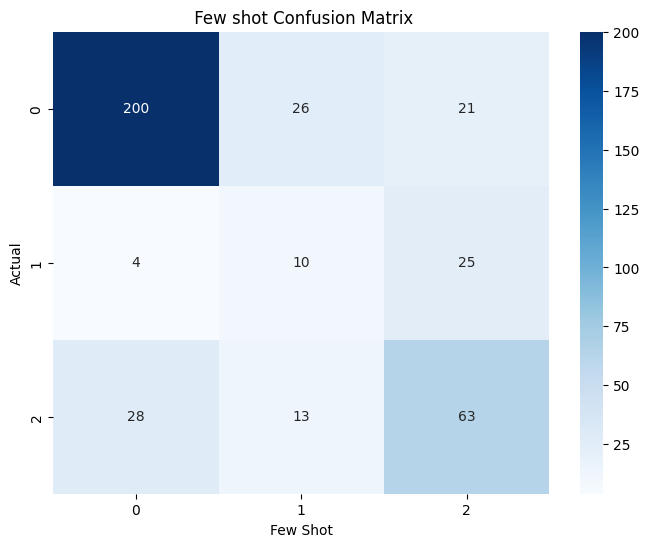

Accuracy: 0.7
Precision: 0.7205136151265314
Recall: 0.7
F1 Score: 0.7093533618997466


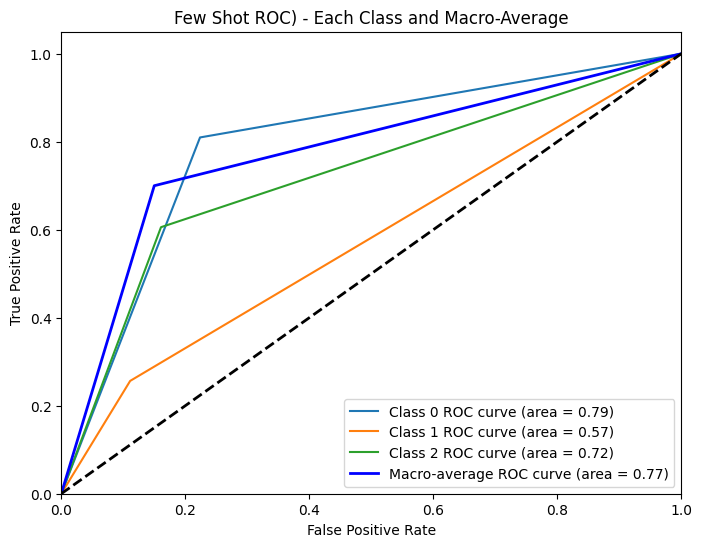

ROC AUC (Class 0): 0.7929701877070299
ROC AUC (Class 1): 0.5726495726495726
ROC AUC (Class 2): 0.722465034965035
ROC AUC (Macro-average): 0.7749999999999999


<Figure size 640x480 with 0 Axes>

In [ ]:

!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize



# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['few shot'] = df['few shot'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['few shot_sentiment'] = df['few shot'].map(sentiment_mapping)

drop_columns = ['actual', 'few shot']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['few shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Few Shot')
plt.ylabel('Actual')
plt.title(' Few shot Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))


# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Few Shot ROC) - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### contexual

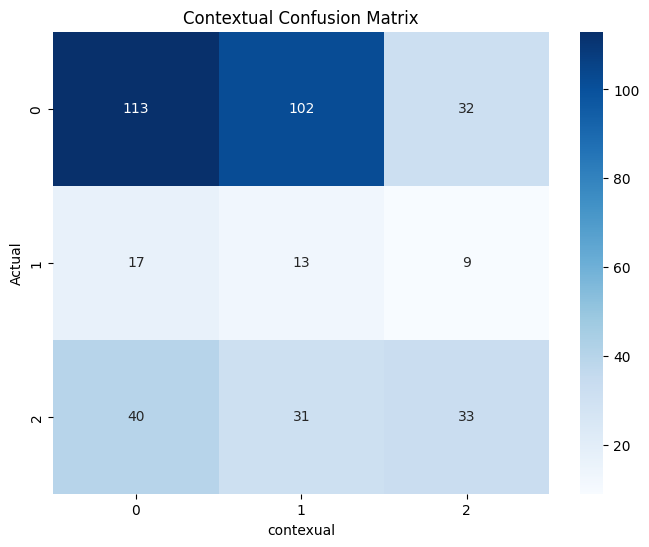

Accuracy: 0.4076923076923077
Precision: 0.5488034206648228
Recall: 0.4076923076923077
F1 Score: 0.4561758622254944


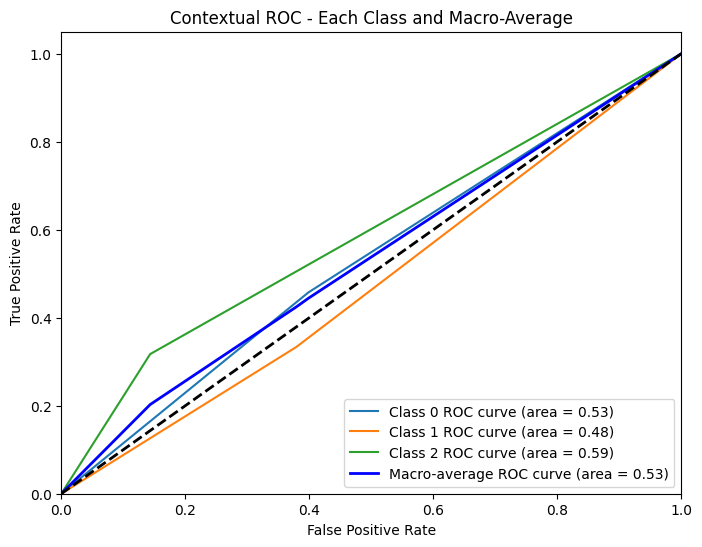

ROC AUC (Class 0): 0.5294442399705558
ROC AUC (Class 1): 0.47720797720797714
ROC AUC (Class 2): 0.5869755244755245
ROC AUC (Macro-average): 0.5312092472180192


<Figure size 640x480 with 0 Axes>

In [ ]:
# Install pyspellchecker
!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'few shot', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['contexual'] = df['contexual'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['contexual_sentiment'] = df['contexual'].map(sentiment_mapping)

drop_columns = ['actual', 'contexual']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['contexual_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('contexual')
plt.ylabel('Actual')
plt.title('Contextual Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')
from sklearn.metrics import roc_curve, auc
import numpy as np # Import numpy for array operation
# Plot ROC for macro-average
# Calculate macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)


# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Contextual ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### instruction based

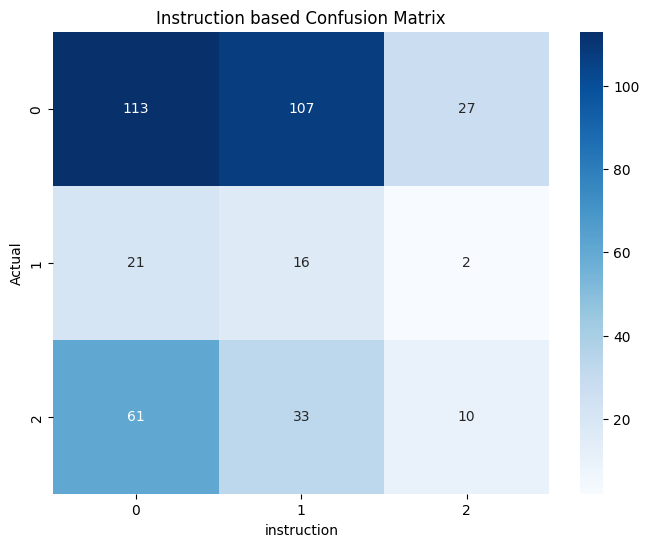

Accuracy: 0.3564102564102564
Precision: 0.44564102564102565
Recall: 0.3564102564102564
F1 Score: 0.37753736459618814


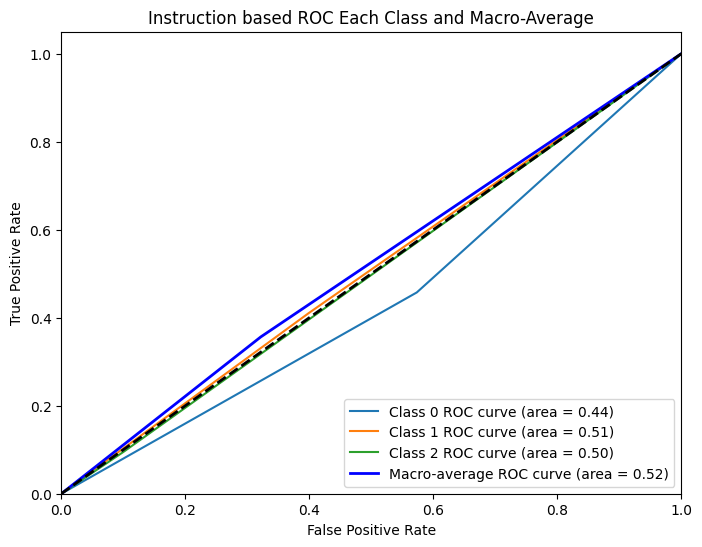

ROC AUC (Class 0): 0.44203165255796834
ROC AUC (Class 1): 0.5056980056980056
ROC AUC (Class 2): 0.49737762237762245
ROC AUC (Macro-average): 0.5173076923076924


<Figure size 640x480 with 0 Axes>

In [ ]:


import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Install pyspellchecker
!pip install pyspellchecker


# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'few shot'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['instruction'] = df['instruction'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['instruction_sentiment'] = df['instruction'].map(sentiment_mapping)

drop_columns = ['actual', 'instruction']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['instruction_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('instruction')
plt.ylabel('Actual')
plt.title('Instruction based Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Instruction based ROC Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')


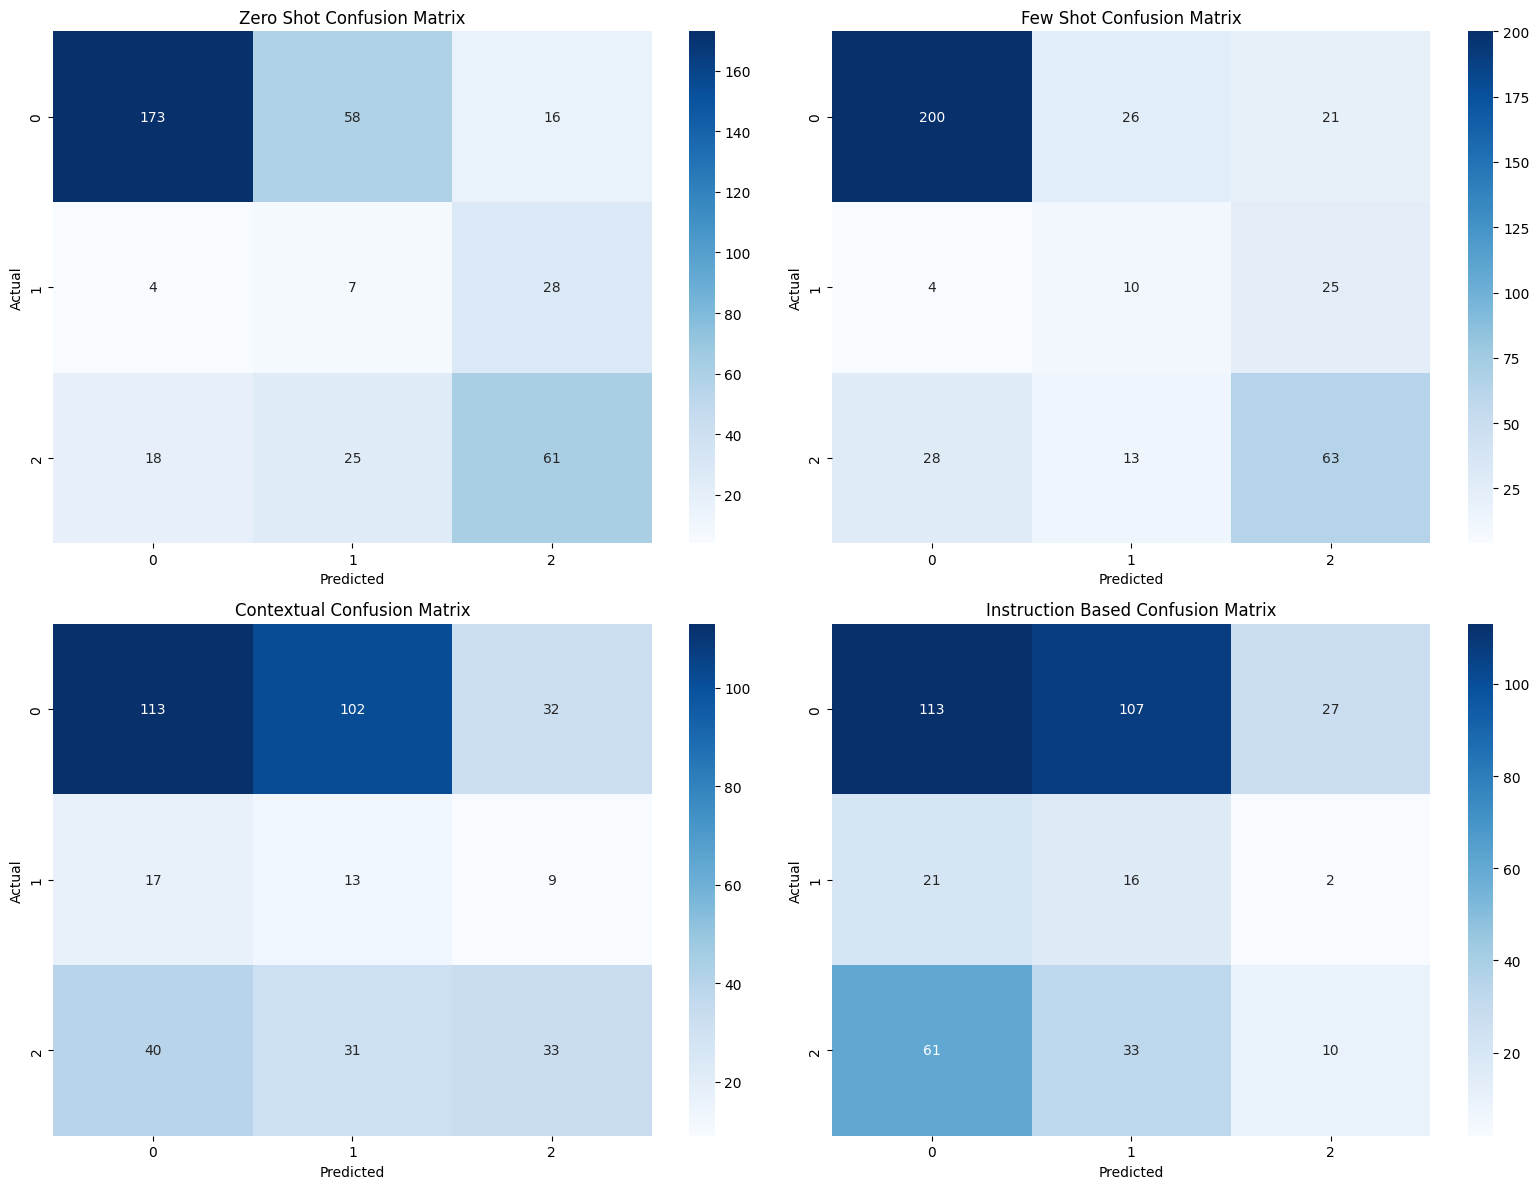

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Install pyspellchecker
!pip install pyspellchecker

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/combined_sentiment_data.xlsx')

# Create subplots for each confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Calculates and plots confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1', '2'],
                yticklabels=['0', '1', '2'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Plot confusion matrices for each method
plot_confusion_matrix(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot Confusion Matrix', axes[0, 0])
plot_confusion_matrix(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot Confusion Matrix', axes[0, 1])
plot_confusion_matrix(df['actual_sentiment'], df['contexual_sentiment'], 'Contextual Confusion Matrix', axes[1, 0])
plot_confusion_matrix(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based Confusion Matrix', axes[1, 1])  # Added Instruction based

plt.tight_layout()
plt.show()

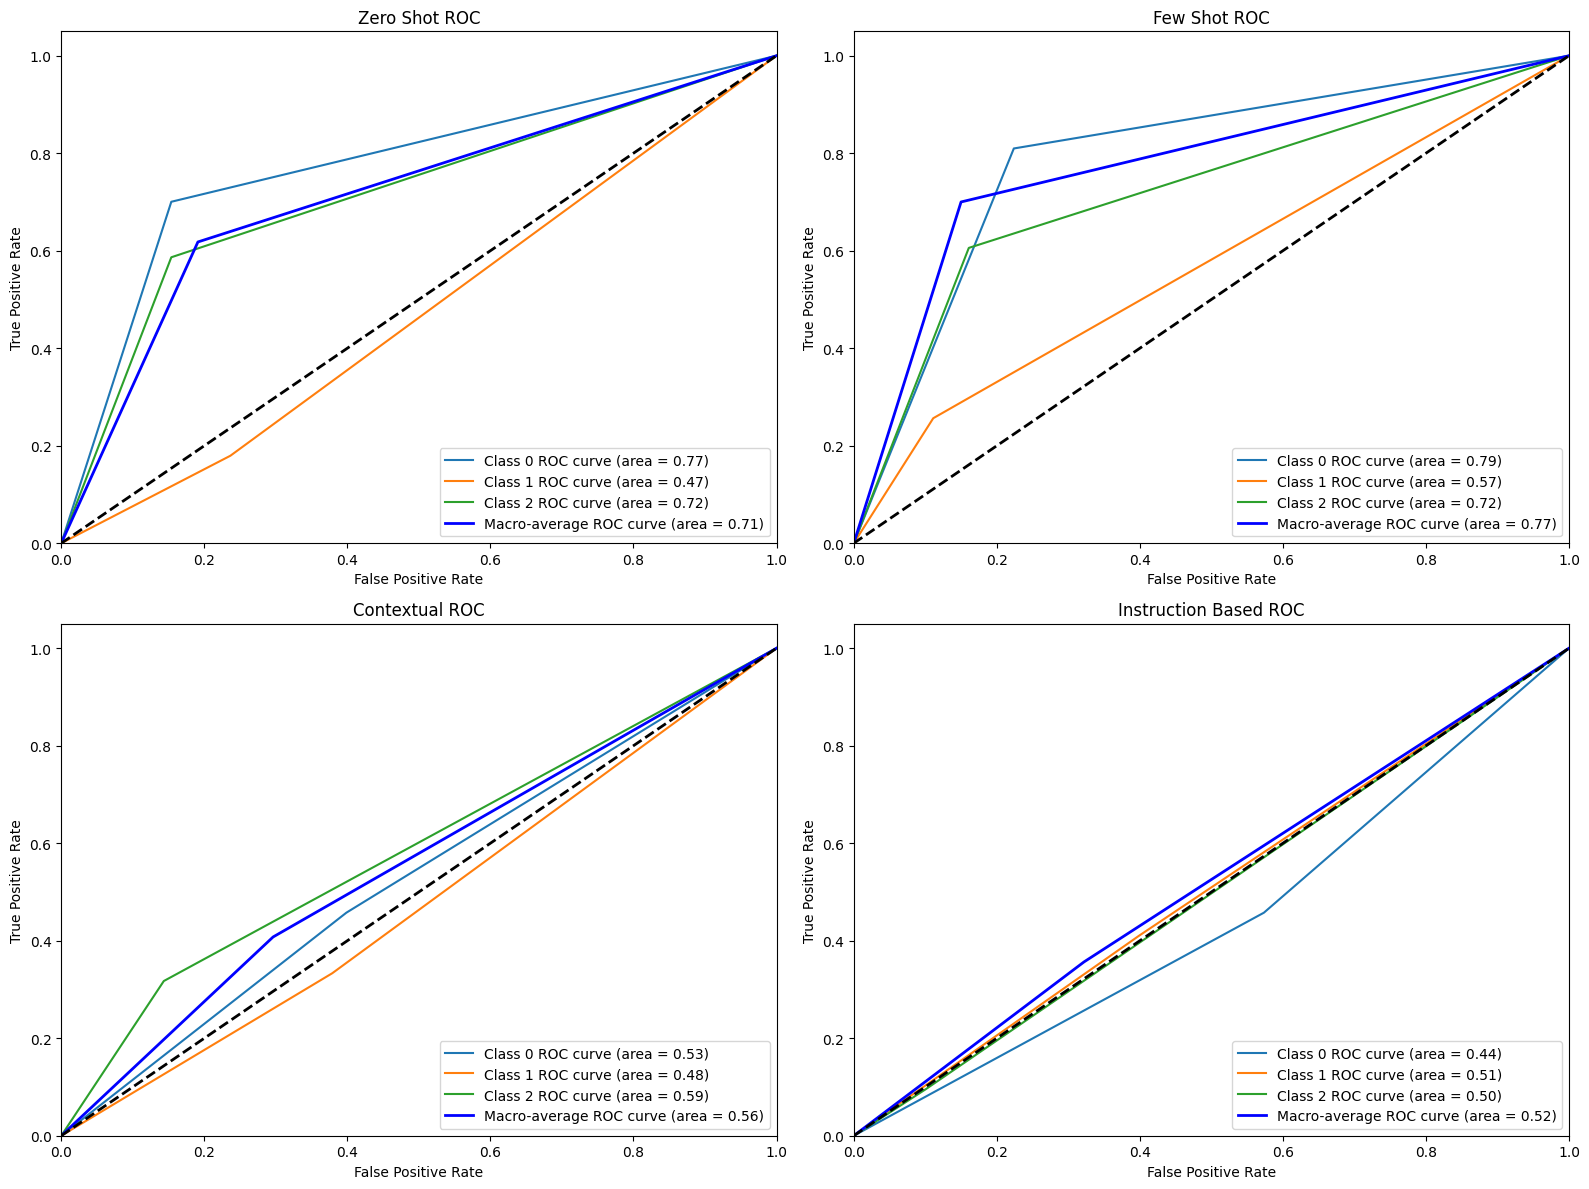

In [ ]:


import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Install pyspellchecker if not already installed
!pip install pyspellchecker

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/combined_sentiment_data.xlsx')

# Create subplots for ROC curves
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot ROC curve
def plot_roc_curve(y_true, y_pred, title, ax):
    """Calculates and plots ROC curve."""
    n_classes = len(df['actual_sentiment'].unique())
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area
    fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC for each class
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

    # Plot ROC for macro-average
    ax.plot(fpr["macro"], tpr["macro"],
             label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='blue', linestyle='-', linewidth=2)

    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")


# Plot ROC curves for each method
plot_roc_curve(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot ROC', axes[0, 0])
plot_roc_curve(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot ROC', axes[0, 1])
plot_roc_curve(df['actual_sentiment'], df['contexual_sentiment'], 'Contextual ROC', axes[1, 0])
plot_roc_curve(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based ROC', axes[1, 1])

plt.tight_layout()
plt.show()


# Gemini

### Zero shot

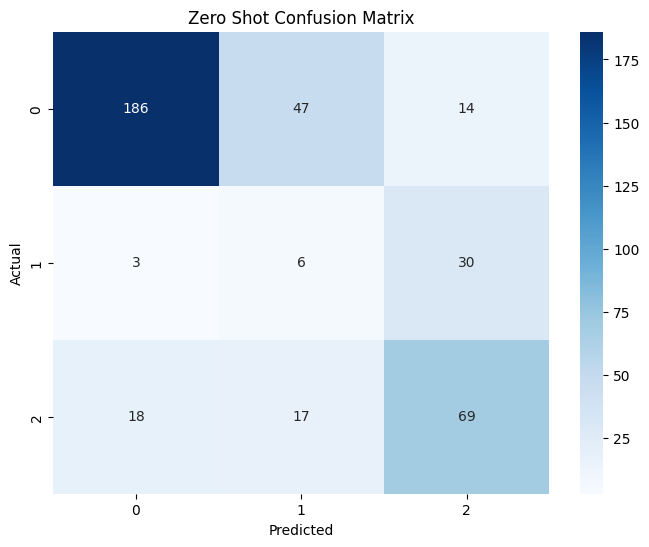

Accuracy: 0.6692307692307692
Precision: 0.740485412582373
Recall: 0.6692307692307692
F1 Score: 0.6995371590456808


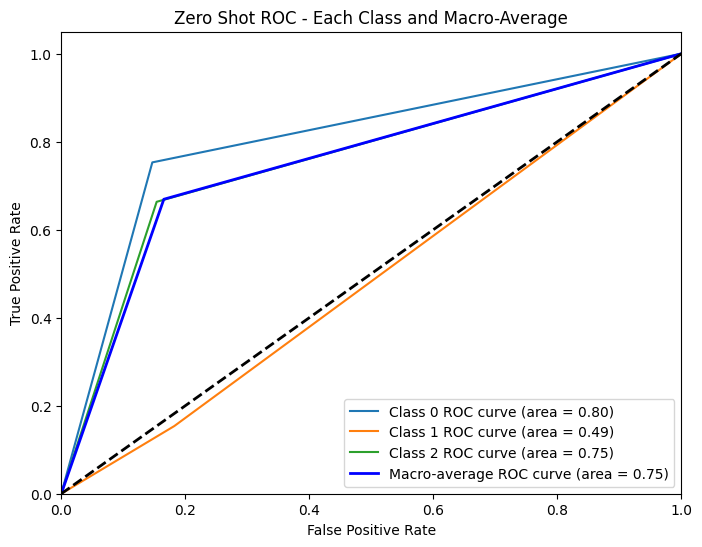

ROC AUC (Class 0): 0.8030916451969083
ROC AUC (Class 1): 0.48575498575498577
ROC AUC (Class 2): 0.7548076923076922
ROC AUC (Macro-average): 0.7519230769230769


<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install pyspellchecker
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Excel file
df = pd.read_excel('/content/Gemini_combined sentiements.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
df['zero shot'] = df['zero shot'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
# Save the DataFrame with corrected spelling
df.to_excel('Gemini_sentiment_data_corrected.xlsx', index=False)

# Load the corrected Excel file
df = pd.read_excel('/content/Gemini_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['few shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)

# Load the DataFrame again
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['zero shot'] = df['zero shot'].str.lower().str.strip()

# Map sentiments for 'zero shot' column
df['zero shot_sentiment'] = df['zero shot'].map(sentiment_mapping)

# Drop original sentiment columns
drop_columns = ['actual', 'zero shot']
df = df.drop(drop_columns, axis=1)

# Save the DataFrame with mapped sentiments
data = df
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame with mapped sentiments
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['zero shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap with class labels 0, 1, 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Zero Shot Confusion Matrix')
plt.show()

# Calculate macro-averaged evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# ROC Curve using macro-averaging for multiclass
# Binarize the output
n_classes = len(df['actual_sentiment'].unique())  # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Shot ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')



### Few Shot

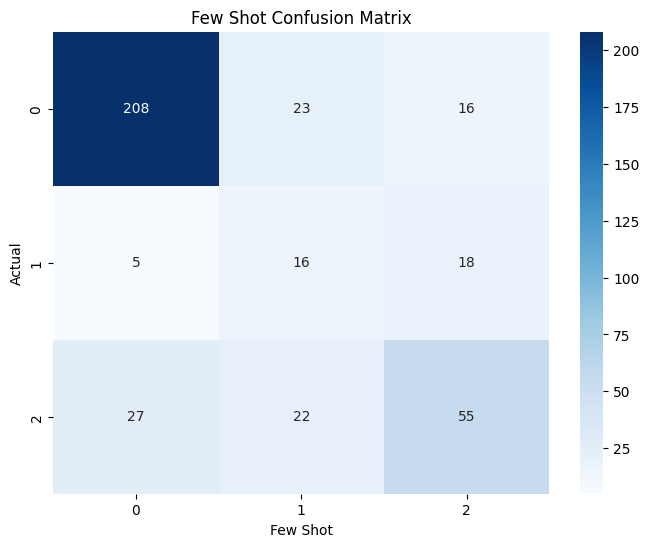

Accuracy: 0.7153846153846154
Precision: 0.7399124045762469
Recall: 0.7153846153846154
F1 Score: 0.7249854986115692


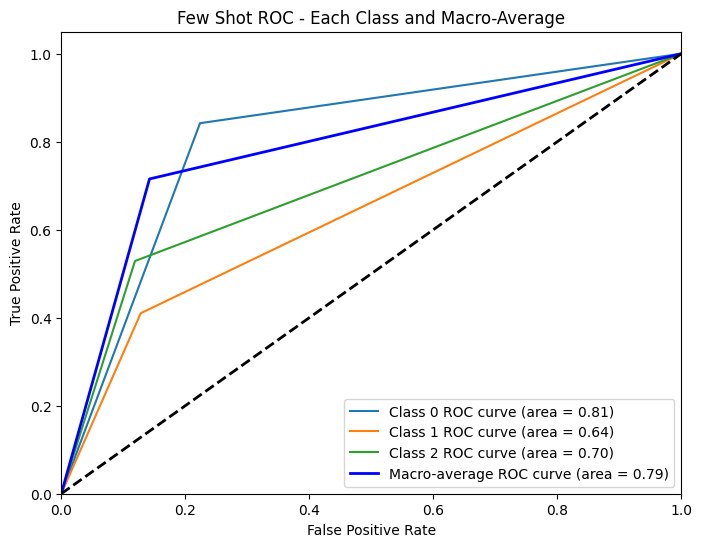

ROC AUC (Class 0): 0.8091645196908355
ROC AUC (Class 1): 0.641025641025641
ROC AUC (Class 2): 0.7049825174825175
ROC AUC (Macro-average): 0.7865384615384617


<Figure size 640x480 with 0 Axes>

In [ ]:

!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize



# Load the Excel file
df = pd.read_excel('/content/Gemini_combined sentiements.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('Gemini_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/Gemini_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['few shot'] = df['few shot'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['few shot_sentiment'] = df['few shot'].map(sentiment_mapping)

drop_columns = ['actual', 'few shot']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['few shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Few Shot')
plt.ylabel('Actual')
plt.title('Few Shot Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))


# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Few Shot ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### contexual

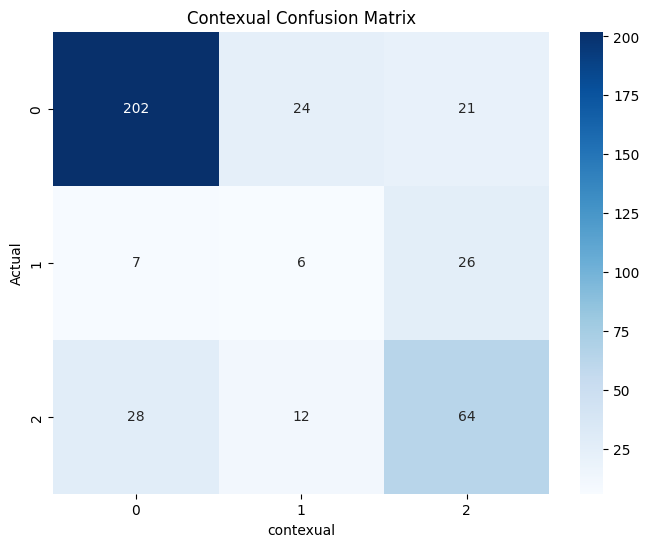

Accuracy: 0.6974358974358974
Precision: 0.7078425622729421
Recall: 0.6974358974358974
F1 Score: 0.7022246424783423


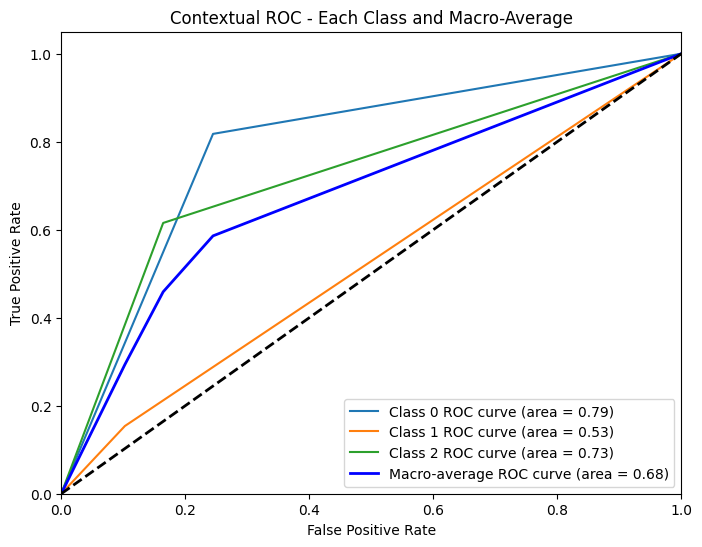

ROC AUC (Class 0): 0.7865292602134706
ROC AUC (Class 1): 0.5256410256410257
ROC AUC (Class 2): 0.7255244755244755
ROC AUC (Macro-average): 0.6792315871263239


<Figure size 640x480 with 0 Axes>

In [ ]:
# Install pyspellchecker
!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load the Excel file
df = pd.read_excel('/content/Gemini_combined sentiements.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('Gemini_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/Gemini_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'few shot', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['contexual'] = df['contexual'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['contexual_sentiment'] = df['contexual'].map(sentiment_mapping)

drop_columns = ['actual', 'contexual']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['contexual_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('contexual')
plt.ylabel('Actual')
plt.title('Contexual Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')
from sklearn.metrics import roc_curve, auc
import numpy as np # Import numpy for array operation
# Plot ROC for macro-average
# Calculate macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)


# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Contextual ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### instruction based

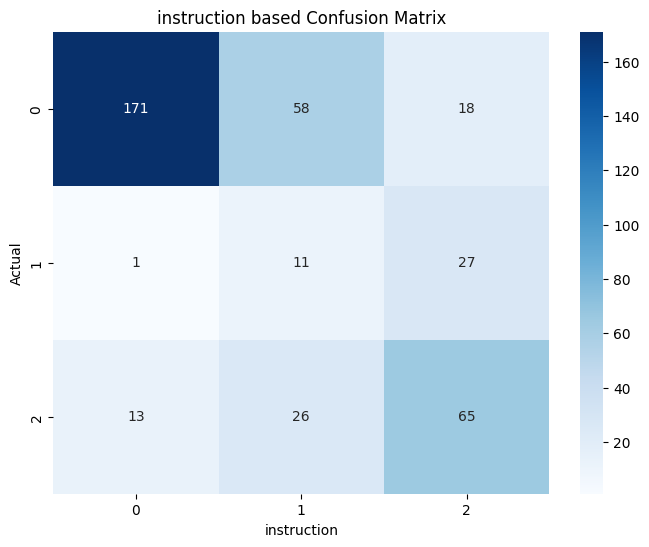

Accuracy: 0.6333333333333333
Precision: 0.754560110349584
Recall: 0.6333333333333333
F1 Score: 0.679800568807055


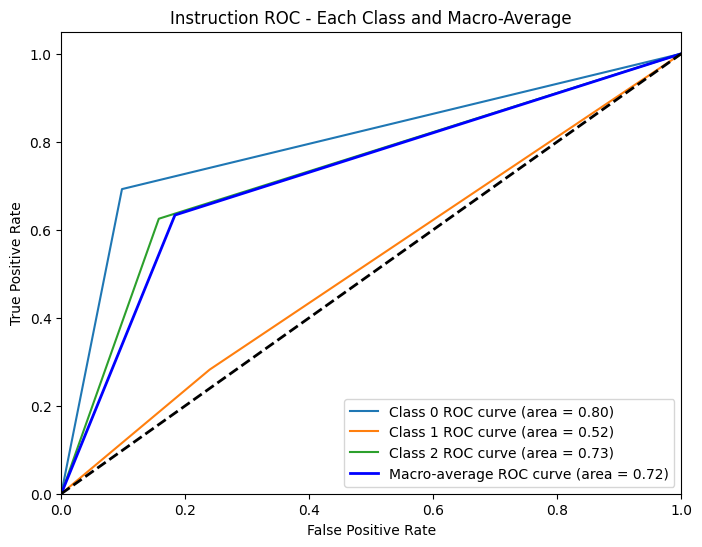

ROC AUC (Class 0): 0.7972027972027972
ROC AUC (Class 1): 0.5213675213675213
ROC AUC (Class 2): 0.7338286713286714
ROC AUC (Macro-average): 0.725


<Figure size 640x480 with 0 Axes>

In [ ]:

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Install pyspellchecker
!pip install pyspellchecker


# Load the Excel file
df = pd.read_excel('/content/Gemini_combined sentiements.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('Gemini_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/Gemini_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'few shot'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['instruction'] = df['instruction'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['instruction_sentiment'] = df['instruction'].map(sentiment_mapping)

drop_columns = ['actual', 'instruction']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['instruction_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('instruction')
plt.ylabel('Actual')
plt.title('instruction based Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Instruction ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')


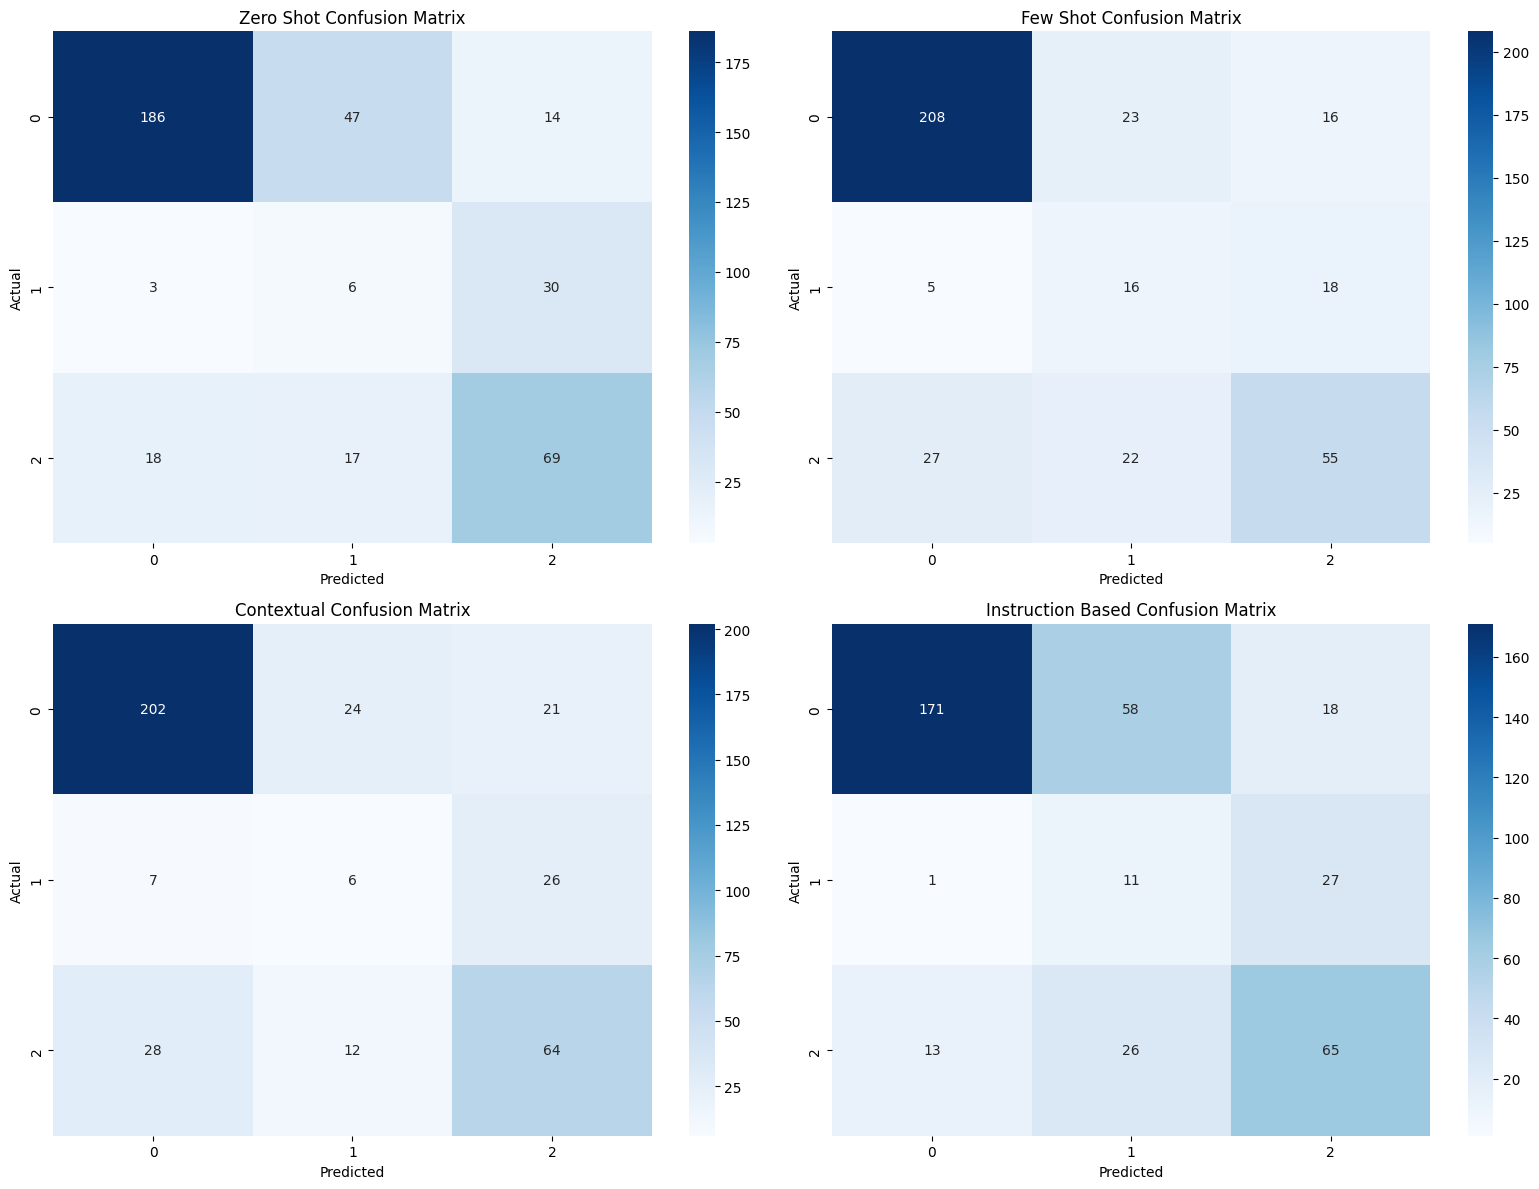

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Install pyspellchecker
!pip install pyspellchecker

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/Gemini_combined sentiements.xlsx')

# Create subplots for each confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Calculates and plots confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1', '2'],
                yticklabels=['0', '1', '2'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Plot confusion matrices for each method
plot_confusion_matrix(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot Confusion Matrix', axes[0, 0])
plot_confusion_matrix(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot Confusion Matrix', axes[0, 1])
plot_confusion_matrix(df['actual_sentiment'], df['contexual_sentiment'], 'Contextual Confusion Matrix', axes[1, 0])
plot_confusion_matrix(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based Confusion Matrix', axes[1, 1])  # Added Instruction based

plt.tight_layout()
plt.show()

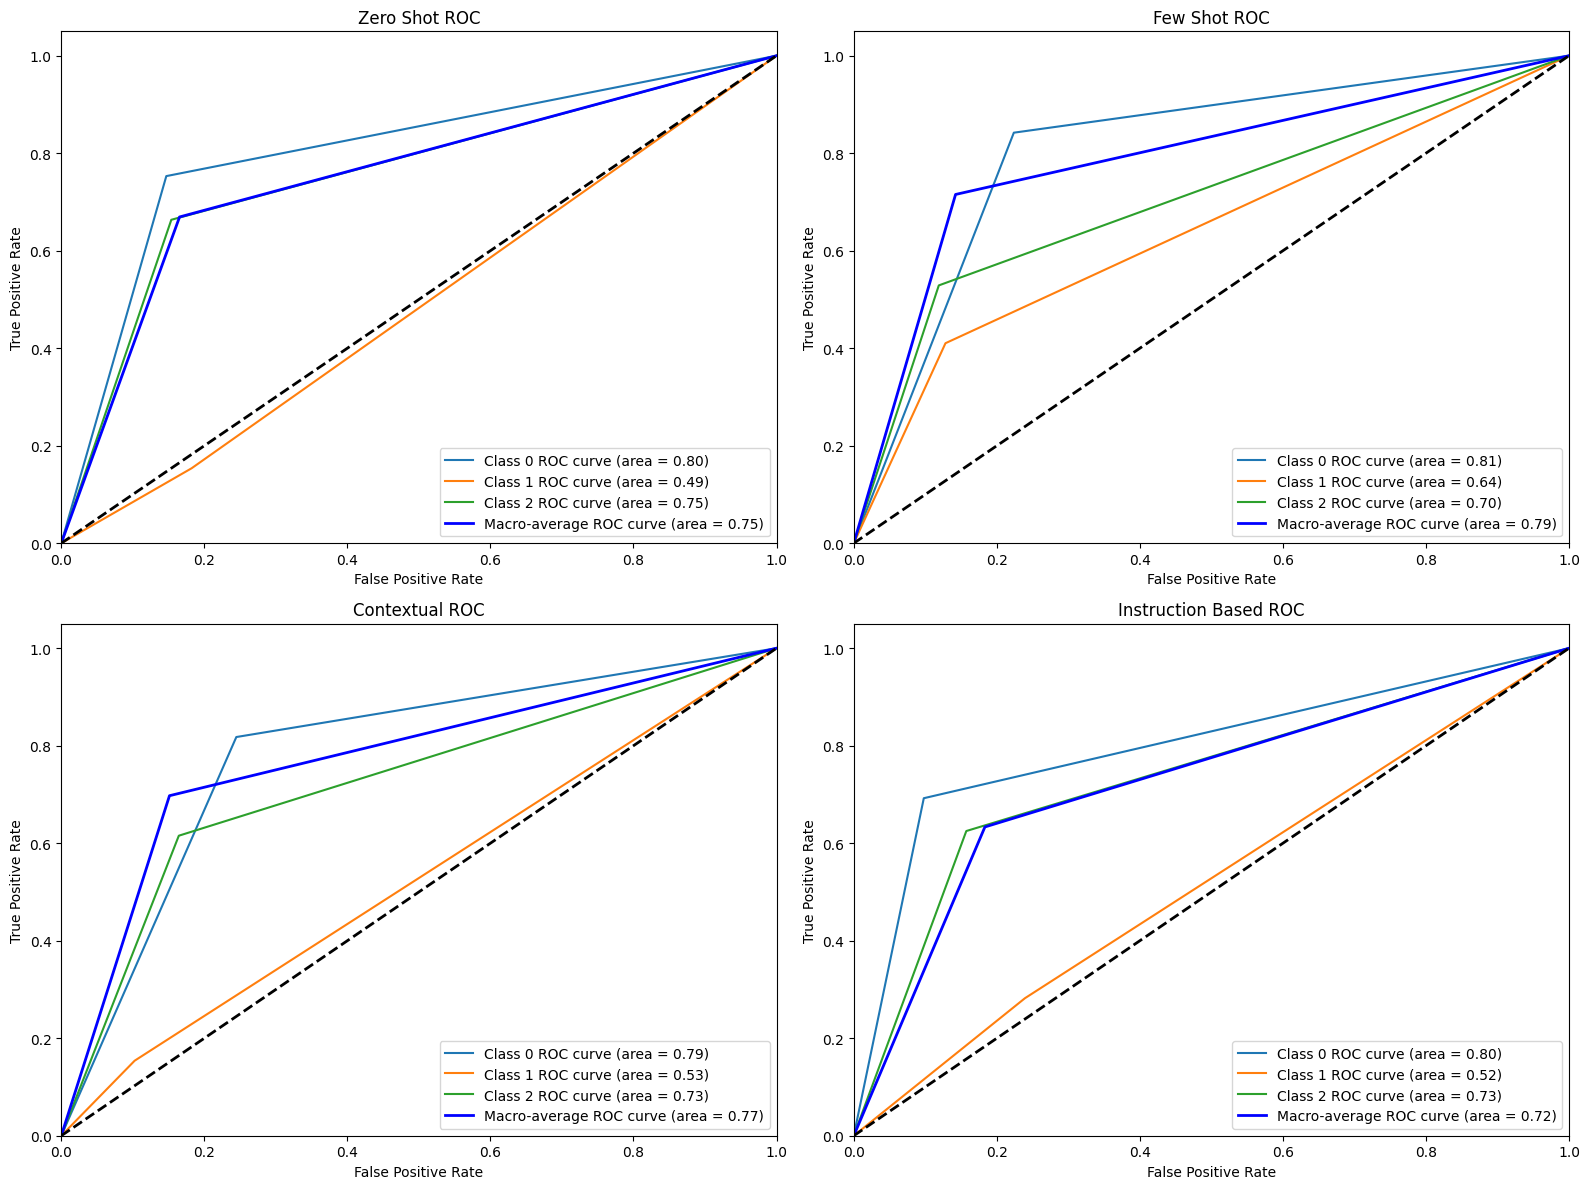

In [ ]:

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Install pyspellchecker
!pip install pyspellchecker

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/Gemini_combined sentiements.xlsx')

# Create subplots for each ROC curve
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot ROC curve
def plot_roc_curve(y_true, y_pred, title, ax):
    """Calculates and plots ROC curve."""
    n_classes = len(df['actual_sentiment'].unique())
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area
    fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC for each class
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

    # Plot ROC for macro-average
    ax.plot(fpr["macro"], tpr["macro"],
             label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='blue', linestyle='-', linewidth=2)

    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")

# Plot ROC curves for each method
plot_roc_curve(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot ROC', axes[0, 0])
plot_roc_curve(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot ROC', axes[0, 1])
plot_roc_curve(df['actual_sentiment'], df['contexual_sentiment'], 'Contextual ROC', axes[1, 0])
plot_roc_curve(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based ROC', axes[1, 1])

plt.tight_layout()
plt.show()


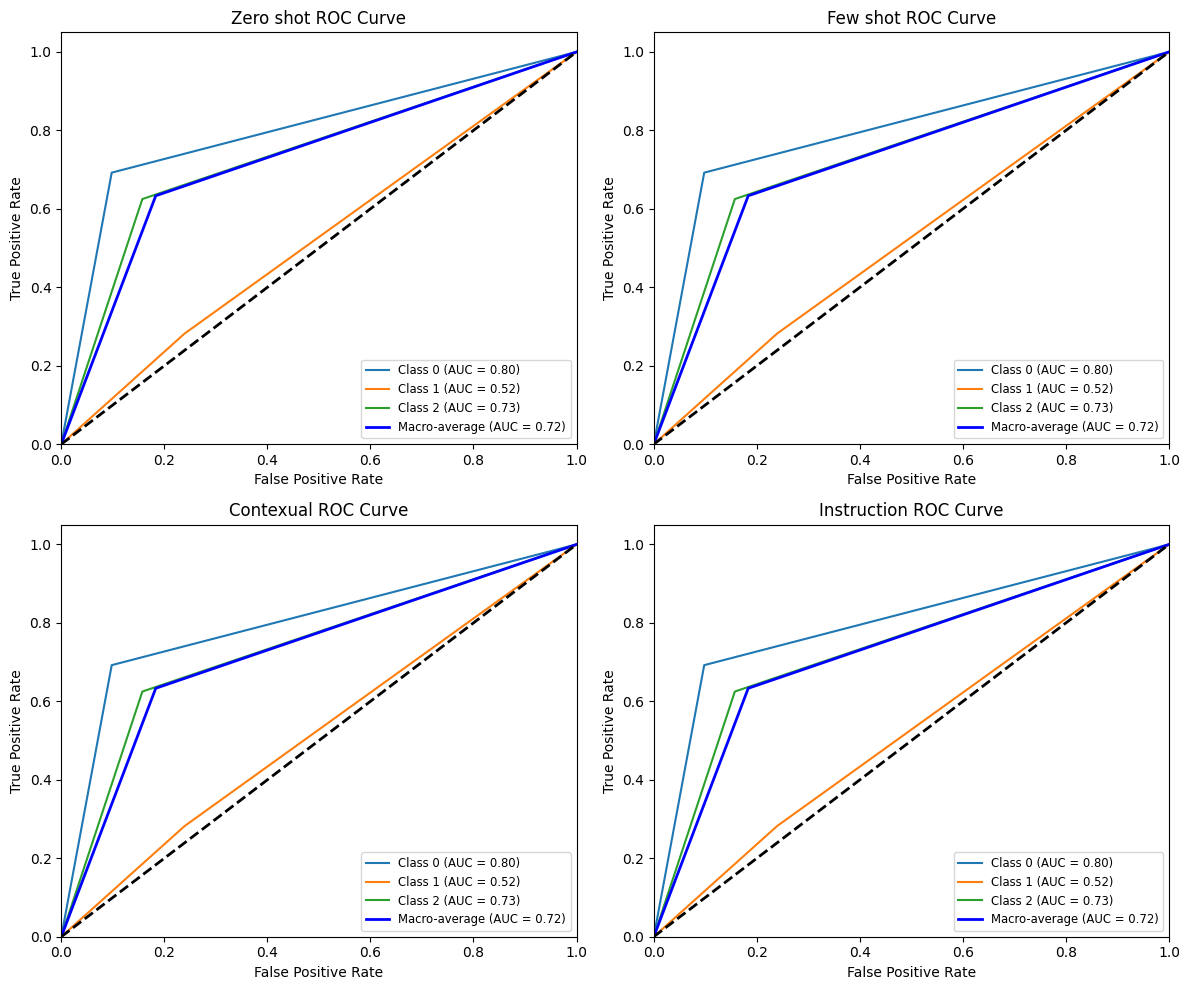

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Install pyspellchecker if not already installed
!pip install pyspellchecker


def calculate_roc_auc(y_true, y_pred, n_classes):
    """Calculates ROC curve and AUC for multiclass."""
    # ... (same as before) ...
    return fpr, tpr, roc_auc

# ... (rest of the data loading and preprocessing code remains the same) ...

# Calculate ROC for each prompt
n_classes = len(df['actual_sentiment'].unique()) # Get the number of classes
prompts = ['zero shot', 'few shot', 'contexual', 'instruction']
y_preds = [y_pred_zero_shot, y_pred_few_shot, y_pred_contexual, y_pred_instruction]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots
axes = axes.ravel()  # Flatten the axes array for easier iteration

for i, prompt in enumerate(prompts):
    # Calculate ROC for the current prompt
    fpr, tpr, roc_auc_score = calculate_roc_auc(y_true, y_preds[i], n_classes)

    # Plot ROC curve on the current subplot
    # Plot for each class
    for j in range(n_classes):
        axes[i].plot(fpr[j], tpr[j],
                     label=f'Class {j} (AUC = {roc_auc_score[j]:.2f})')

    # Plot macro-average
    axes[i].plot(fpr["macro"], tpr["macro"],
                 label='Macro-average (AUC = {0:.2f})'.format(roc_auc_score["macro"]),
                 color='blue', linestyle='-', linewidth=2)

    axes[i].plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'{prompt.capitalize()} ROC Curve')
    axes[i].legend(loc="lower right", fontsize='small') # Adjust fontsize if needed

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Claude

### Zero shot

```
# This is formatted as code
```



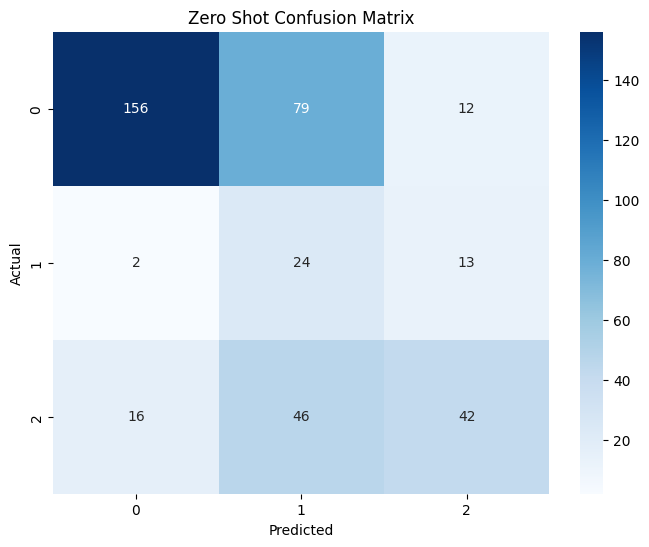

Accuracy: 0.5692307692307692
Precision: 0.7510876536088362
Recall: 0.5692307692307692
F1 Score: 0.6258847367741299


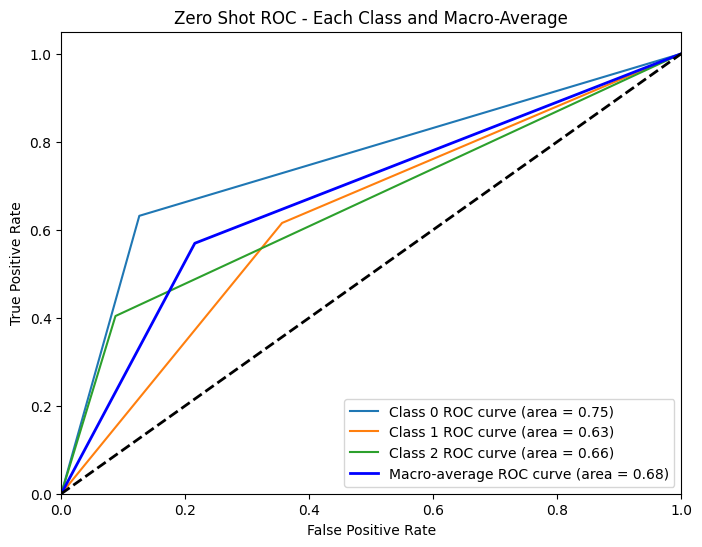

ROC AUC (Class 0): 0.7528524107471476
ROC AUC (Class 1): 0.6296296296296298
ROC AUC (Class 2): 0.6582167832167832
ROC AUC (Macro-average): 0.676923076923077


<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install pyspellchecker
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Excel file
df = pd.read_excel('/content/Claude Sentiment combined.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
df['zero shot'] = df['zero shot'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
# Save the DataFrame with corrected spelling
df.to_excel('claude_sentiment_data_corrected.xlsx', index=False)

# Load the corrected Excel file
df = pd.read_excel('/content/claude_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['few shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)

# Load the DataFrame again
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['zero shot'] = df['zero shot'].str.lower().str.strip()

# Map sentiments for 'zero shot' column
df['zero shot_sentiment'] = df['zero shot'].map(sentiment_mapping)

# Drop original sentiment columns
drop_columns = ['actual', 'zero shot']
df = df.drop(drop_columns, axis=1)

# Save the DataFrame with mapped sentiments
data = df
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame with mapped sentiments
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['zero shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap with class labels 0, 1, 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Zero Shot Confusion Matrix')
plt.show()

# Calculate  evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using macro-averaging for multiclass
# Binarize the output
n_classes = len(df['actual_sentiment'].unique())  # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Shot ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')



### Few shot

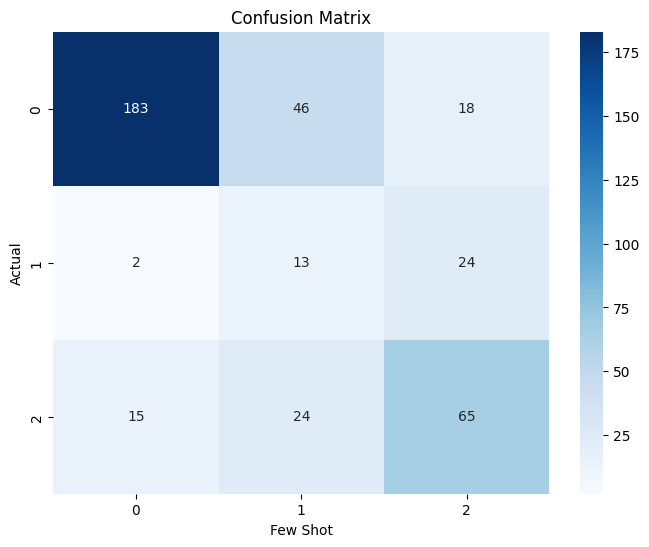

Accuracy: 0.6692307692307692
Precision: 0.7571564200728145
Recall: 0.6692307692307692
F1 Score: 0.7041767064922497


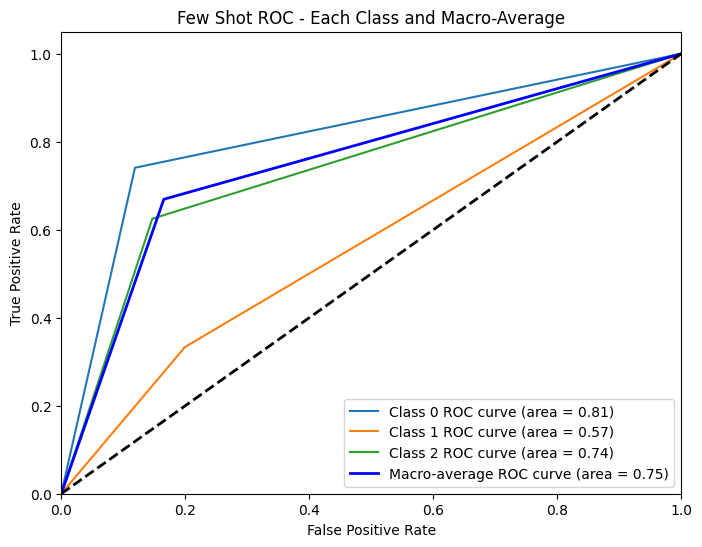

ROC AUC (Class 0): 0.8110047846889953
ROC AUC (Class 1): 0.5669515669515669
ROC AUC (Class 2): 0.7390734265734266
ROC AUC (Macro-average): 0.7519230769230769


<Figure size 640x480 with 0 Axes>

In [ ]:

!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize



# Load the Excel file
df = pd.read_excel('/content/Claude Sentiment combined.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('claude_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/claude_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['few shot'] = df['few shot'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['few shot_sentiment'] = df['few shot'].map(sentiment_mapping)

drop_columns = ['actual', 'few shot']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['few shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Few Shot')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))


# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Few Shot ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### contexual



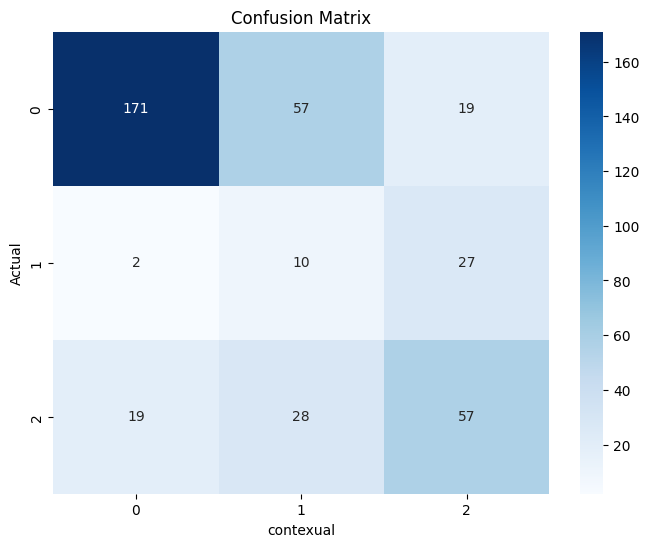

Accuracy: 0.6102564102564103
Precision: 0.7221616313234542
Recall: 0.6102564102564103
F1 Score: 0.655179353964718


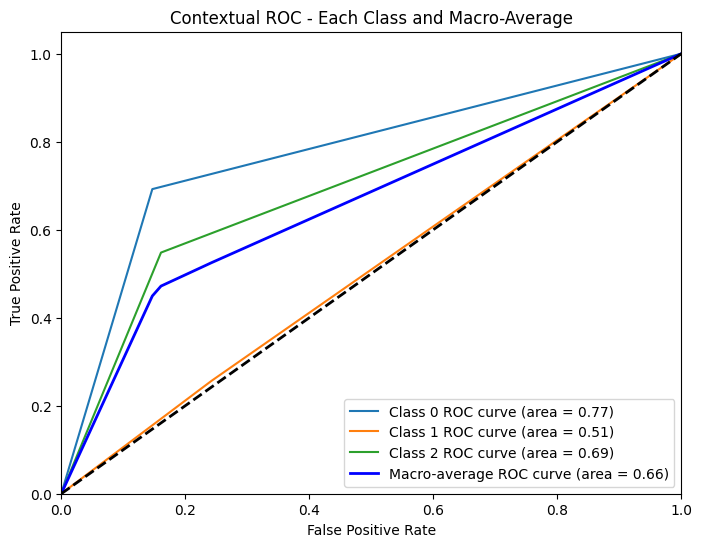

ROC AUC (Class 0): 0.7727272727272727
ROC AUC (Class 1): 0.5071225071225071
ROC AUC (Class 2): 0.6936188811188811
ROC AUC (Macro-average): 0.6578228869895536


<Figure size 640x480 with 0 Axes>

In [ ]:
# Install pyspellchecker
!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load the Excel file
df = pd.read_excel('/content/Claude Sentiment combined.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('claude_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/claude_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'few shot', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['contexual'] = df['contexual'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['contexual_sentiment'] = df['contexual'].map(sentiment_mapping)

drop_columns = ['actual', 'contexual']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['contexual_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('contexual')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')
from sklearn.metrics import roc_curve, auc
import numpy as np # Import numpy for array operation
# Plot ROC for macro-average
# Calculate macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)


# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Contextual ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')

### instruction based

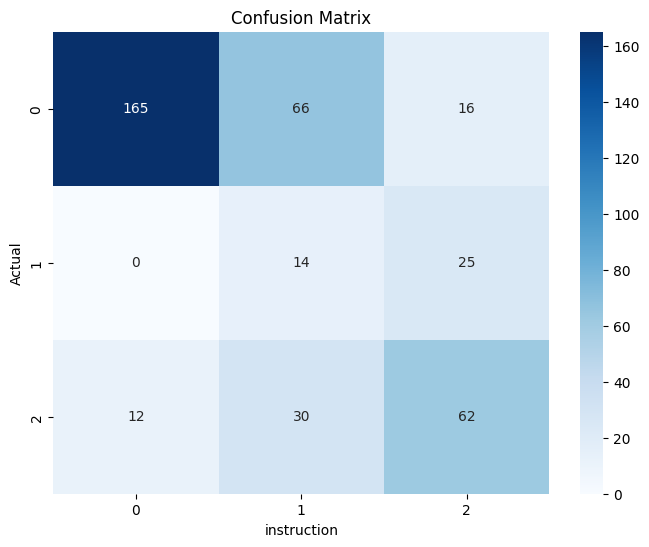

Accuracy: 0.617948717948718
Precision: 0.7636405523060121
Recall: 0.617948717948718
F1 Score: 0.6714588256573105


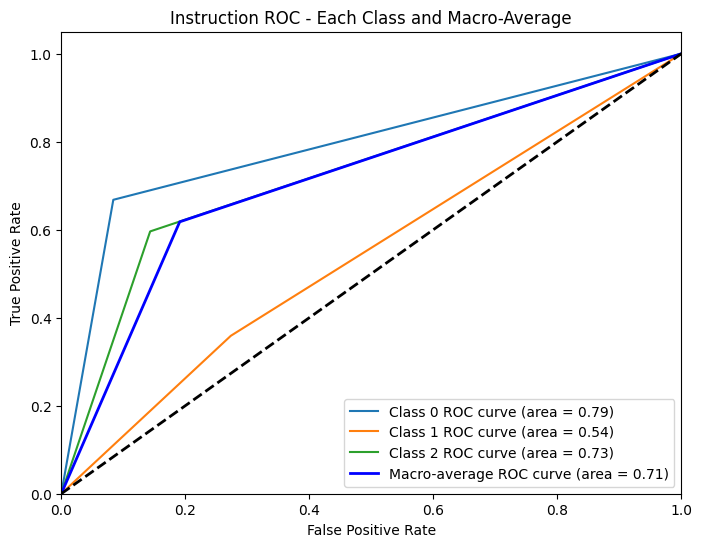

ROC AUC (Class 0): 0.7920500552079499
ROC AUC (Class 1): 0.5427350427350427
ROC AUC (Class 2): 0.7263986013986015
ROC AUC (Macro-average): 0.7134615384615385


<Figure size 640x480 with 0 Axes>

In [ ]:

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Install pyspellchecker
!pip install pyspellchecker


# Load the Excel file
df = pd.read_excel('/content/Claude Sentiment combined.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('claude_sentiment_data_corrected.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/claude_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'few shot'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)


# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral': 1
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['instruction'] = df['instruction'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['instruction_sentiment'] = df['instruction'].map(sentiment_mapping)

drop_columns = ['actual', 'instruction']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['instruction_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('instruction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and the macro-average
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

# Plot ROC for macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='blue', linestyle='-', linewidth=2)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Instruction ROC - Each Class and Macro-Average')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC for each class and macro-average
for i in range(n_classes):
    print(f"ROC AUC (Class {i}): {roc_auc[i]}")
print(f"ROC AUC (Macro-average): {roc_auc['macro']}")

# Save the ROC curve plot
plt.savefig('roc_curve_macro_average.png')


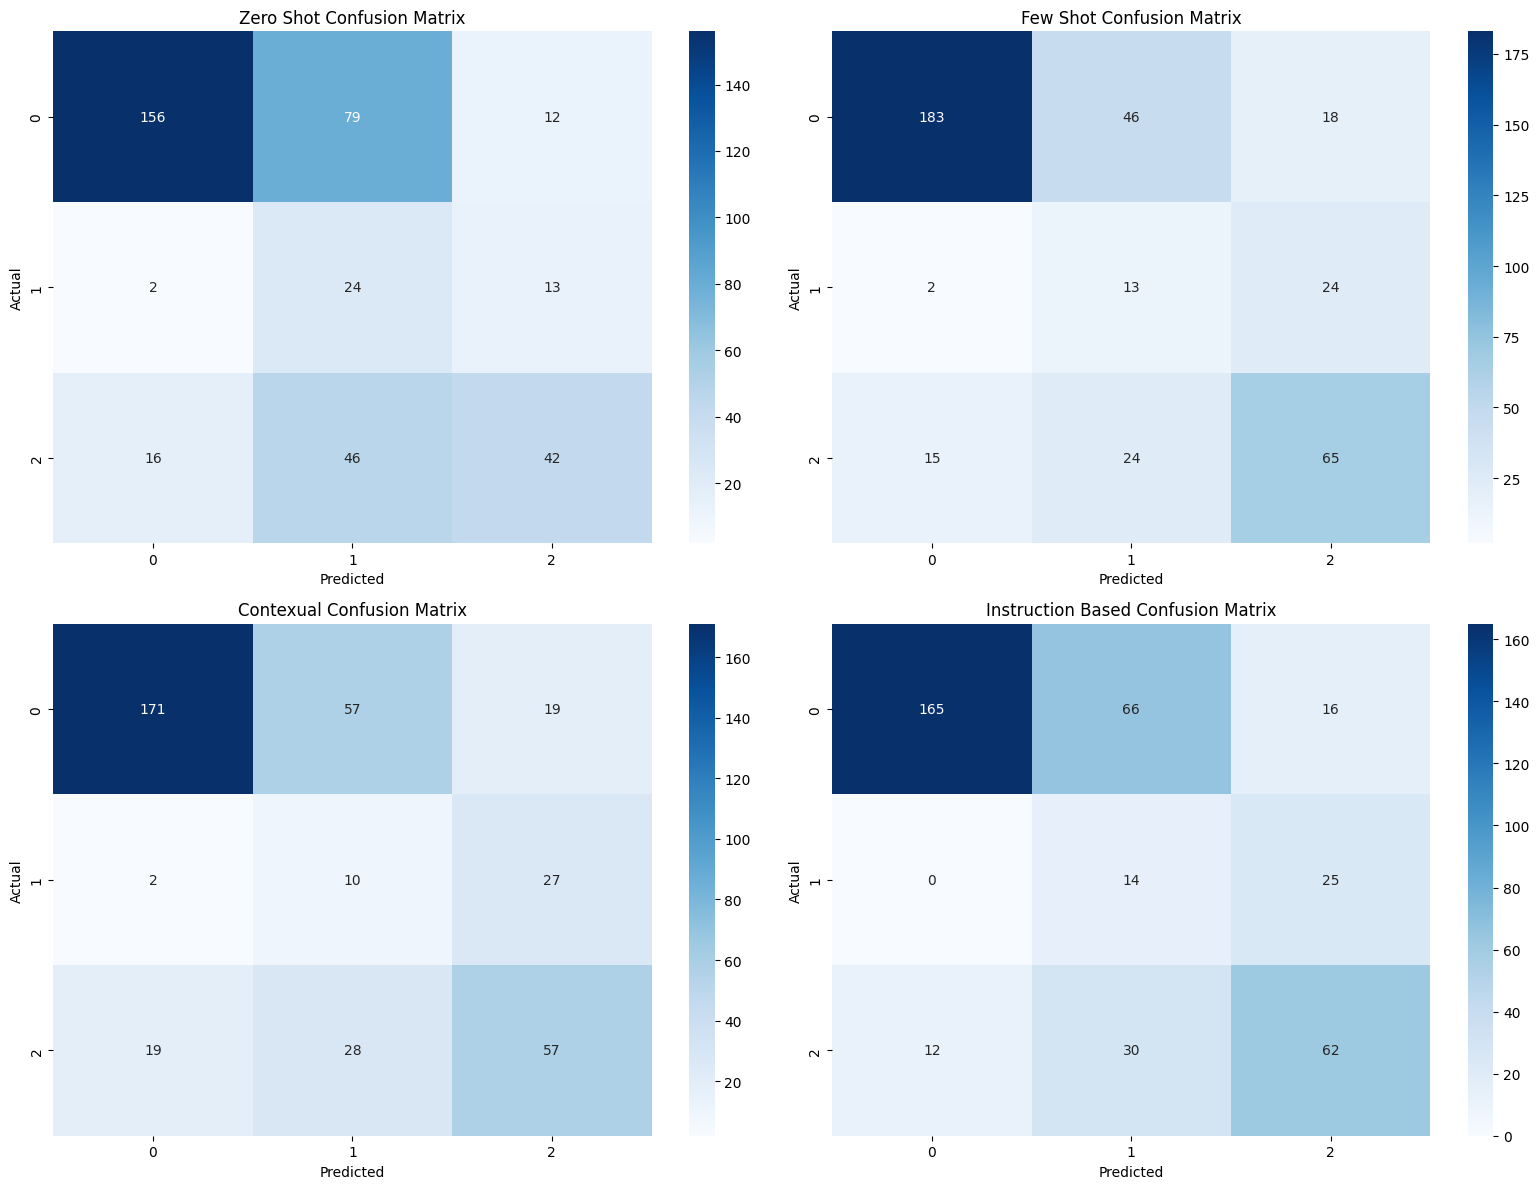

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Install pyspellchecker
!pip install pyspellchecker

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/Claude Sentiment combined.xlsx')

# Create subplots for each confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Calculates and plots confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1', '2'],
                yticklabels=['0', '1', '2'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Plot confusion matrices for each method
plot_confusion_matrix(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot Confusion Matrix', axes[0, 0])
plot_confusion_matrix(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot Confusion Matrix', axes[0, 1])
plot_confusion_matrix(df['actual_sentiment'], df['contexual_sentiment'], 'Contexual Confusion Matrix', axes[1, 0])
plot_confusion_matrix(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based Confusion Matrix', axes[1, 1])  # Added Instruction based

plt.tight_layout()
plt.show()

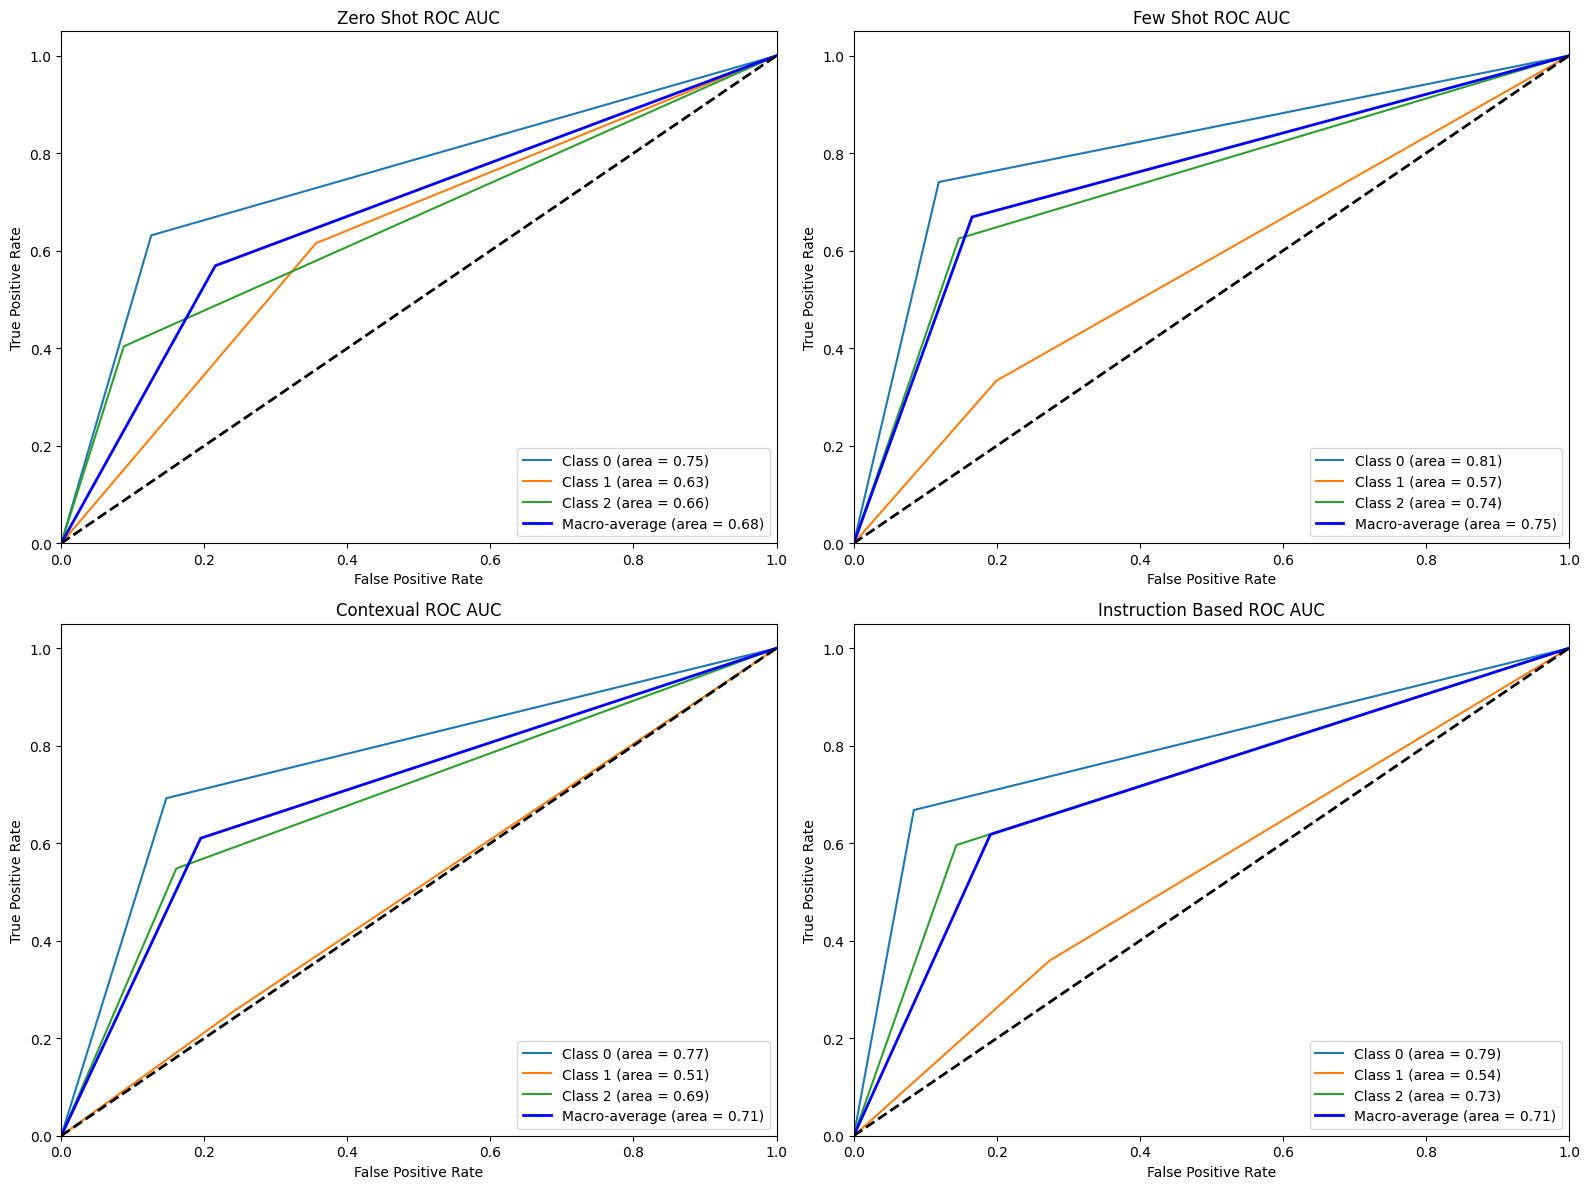

In [ ]:
# prompt: similarly as the script above but know do the ROC AUC for each prompt in same subplot

# Install pyspellchecker
!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Function to load, preprocess, and map sentiments
def preprocess_data(file_path):
    """Loads, preprocesses data, and maps sentiments."""
    df = pd.read_excel(file_path)
    spell = SpellChecker()
    sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

    # Spell check and sentiment mapping for 'actual' column
    df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
    df['actual'] = df['actual'].str.lower()  # Convert to lowercase
    df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

    # Process other columns: 'Zero shot', 'Few shot', 'Contexual', 'Instruction'
    for column in ['zero shot', 'few shot', 'contexual', 'instruction']:
        df[column] = df[column].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))
        df[column] = df[column].str.lower()  # Convert to lowercase
        df[f'{column}_sentiment'] = df[column].map(sentiment_mapping)

    return df

# Load and preprocess the data
df = preprocess_data('/content/Claude Sentiment combined.xlsx')

# Create subplots for each ROC curve
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to calculate and plot ROC AUC
def plot_roc_auc(y_true, y_pred, title, ax):
    """Calculates and plots ROC AUC."""
    n_classes = len(df['actual_sentiment'].unique())
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area
    fpr["macro"], tpr["macro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC for each class and macro-average
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

    ax.plot(fpr["macro"], tpr["macro"], label='Macro-average (area = {0:0.2f})'.format(roc_auc["macro"]), color='blue', linestyle='-', linewidth=2)

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")


# Plot ROC AUC curves for each method
plot_roc_auc(df['actual_sentiment'], df['zero shot_sentiment'], 'Zero Shot ROC AUC', axes[0, 0])
plot_roc_auc(df['actual_sentiment'], df['few shot_sentiment'], 'Few Shot ROC AUC', axes[0, 1])
plot_roc_auc(df['actual_sentiment'], df['contexual_sentiment'], 'Contexual ROC AUC', axes[1, 0])
plot_roc_auc(df['actual_sentiment'], df['instruction_sentiment'], 'Instruction Based ROC AUC', axes[1, 1])

plt.tight_layout()
plt.show()
